# 1 Chuẩn bị Dataset (Extended MNIST)

- MNIST: chỉ có chữ số từ 0-9
- EMNIST: có cả chữ số và chữ số (0-9) và chữ cái (A-Z, cả chữ hoa và chữ thường)
- !!! Dùng tập EMNIST Balanced để có đầy đủ chữ hoa, chữ thường và số

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Đọc dữ liệu
- Đọc dữ liệu EMNIST (ByMerged) từ CSV vào Pandas DataFrame.
- Tách nhãn (label) và dữ liệu ảnh (pixel) sang mảng NumPy.
- Kiểm tra kích thước và một vài mẫu dữ liệu.

In [2]:
import numpy as np
import pandas as pd

dtype = np.uint8
dtype_labels = np.int32

train_df = pd.read_csv(
    '/content/drive/MyDrive/emnist/emnist-bymerge-train.csv',
    header=None,
    dtype=dtype
)

test_df = pd.read_csv(
    '/content/drive/MyDrive/emnist/emnist-bymerge-test.csv',
    header=None,
    dtype=dtype
)

# Cột 0 là nhãn ảnh
y_train = train_df.iloc[:, 0].astype(dtype_labels).values
y_test  = test_df.iloc[:, 0].astype(dtype_labels).values

# Các cột còn lại là giá trị mức xám của từng pixel
X_train = train_df.iloc[:, 1:].values
X_test  = test_df.iloc[:, 1:].values

print("Train images:", X_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test.shape)
print("Train labels sample:", y_train[:10])
print("Train pixel sample:\n", X_train[0])

Train images: (697932, 784)
Train labels: (697932,)
Test images: (116323, 784)
Test labels: (116323,)
Train labels sample: [24 36  5  6 35  6  3  1 26 37]
Train pixel sample:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  21  32  37  37  37  21   8   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7
  22  81 114 127 127 125  81  46   7   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   3  10  91 159 231 244 246 245 245 231 207
  90  35   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1  22
  47 163 218 250 246 222 217 221 244 242 163  90   7   0   0   0   0   0
   0   0   0   0   0 

## 1.2 Lập bảng ánh xạ nhãn và kí tự
- Đọc nhãn từ file mapping
- Cho biết nhãn số của EMNIST tương ứng với ký tự nào.
- Bảng nhãn có thể dùng sau này để chuyển nhãn số thành ký tự khi hiển thị ảnh hoặc đánh giá kết quả.

In [3]:
# Đọc mapping nhãn từ file và tạo cột ký tự
label_map = pd.read_csv(
    "/content/drive/MyDrive/emnist/emnist-bymerge-mapping.txt",
    delimiter=' ',
    index_col=0, header=None
).iloc[:, 0]

label_df = pd.DataFrame({
    'ascii': label_map,
    'char': label_map.apply(chr)
})

print(label_df)


    ascii char
0             
0      48    0
1      49    1
2      50    2
3      51    3
4      52    4
5      53    5
6      54    6
7      55    7
8      56    8
9      57    9
10     65    A
11     66    B
12     67    C
13     68    D
14     69    E
15     70    F
16     71    G
17     72    H
18     73    I
19     74    J
20     75    K
21     76    L
22     77    M
23     78    N
24     79    O
25     80    P
26     81    Q
27     82    R
28     83    S
29     84    T
30     85    U
31     86    V
32     87    W
33     88    X
34     89    Y
35     90    Z
36     97    a
37     98    b
38    100    d
39    101    e
40    102    f
41    103    g
42    104    h
43    110    n
44    113    q
45    114    r
46    116    t


## 1.3 Hiển thị ảnh mẫu


### 1.3.1 Xoay ảnh để hiên thị đúng chiều
- Tập dữ liệu của EMNIST khi huấn luyện sẽ bị lật ngang (horizontal flip) và xoay 90 ngược chiều kim

In [4]:
def rotate_and_flip(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

### 1.3.2 Hiển thị ảnh


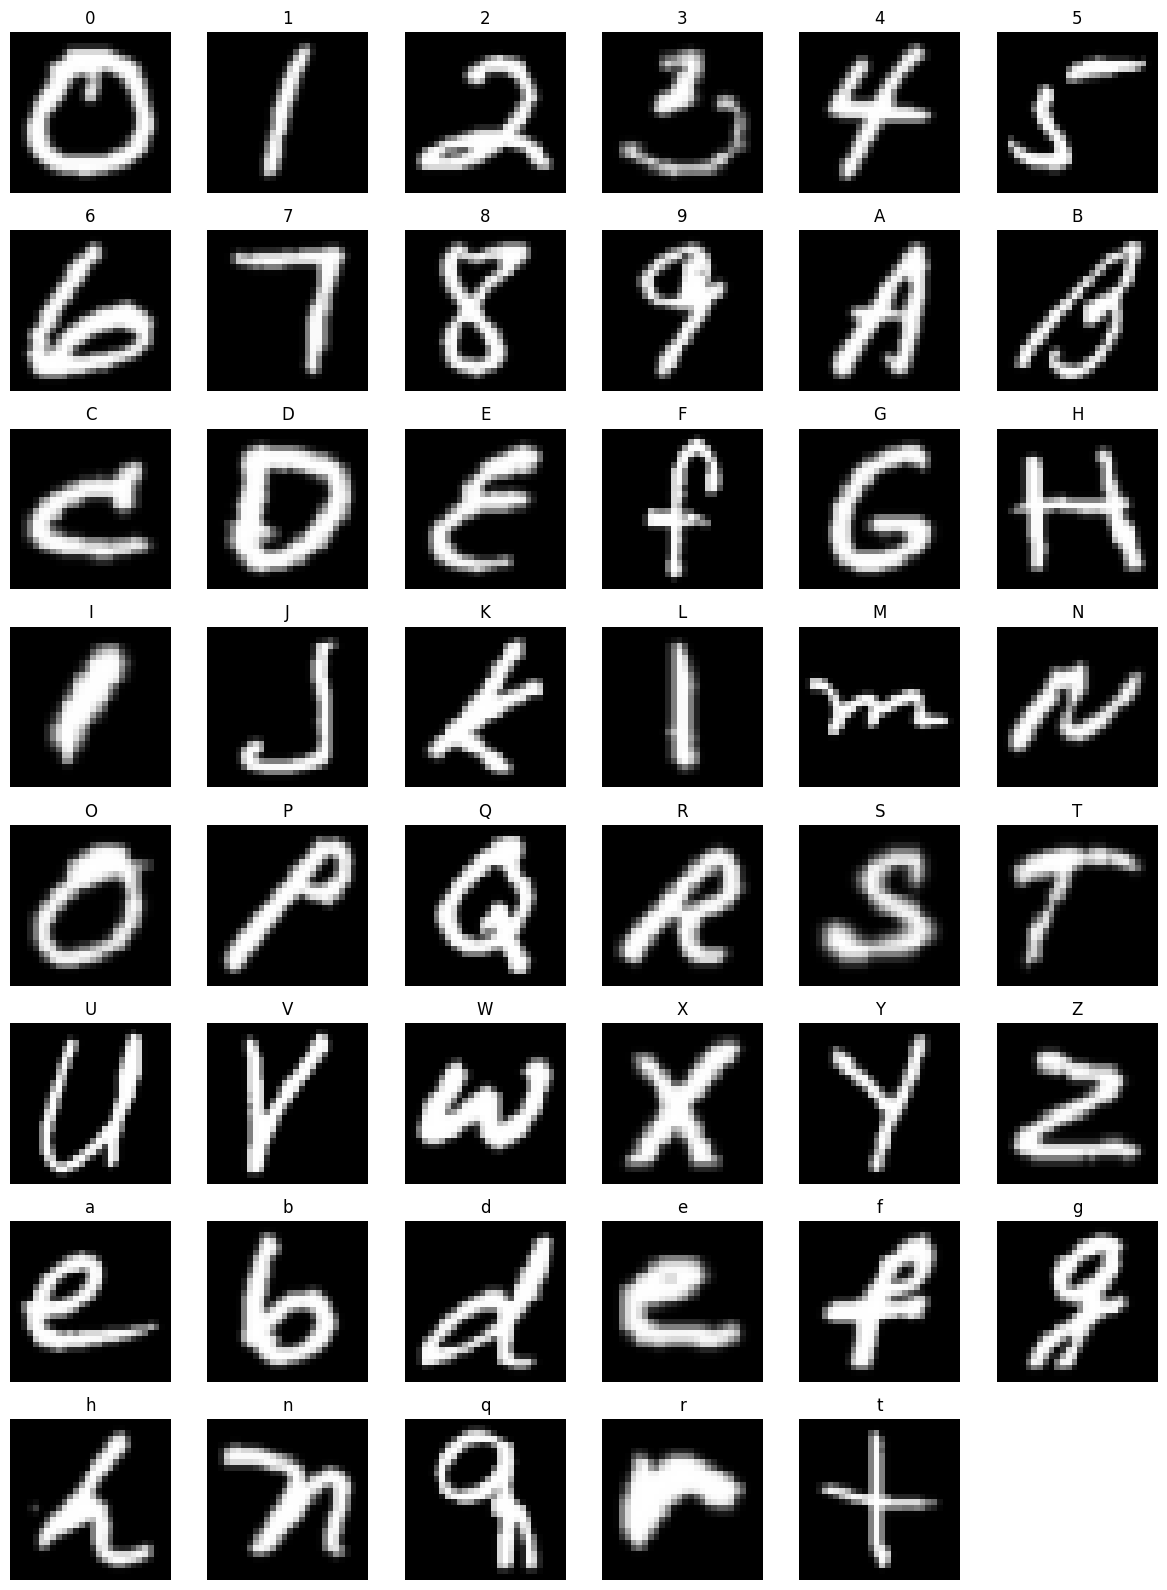

In [5]:
import matplotlib.pyplot as plt
import numpy as np


num_labels = len(label_df)

cols = 6
rows = (num_labels + cols - 1) // cols

plt.figure(figsize=(cols*2, rows*2))

for i, (idx, row) in enumerate(label_df.iterrows()):
    char_label = row['char']
    label_index = idx

    # Tìm ảnh đầu tiên trong X_train có nhãn này
    indices = np.where(y_train == label_index)[0]
    if len(indices) == 0:
        continue
    img_idx = indices[0]

    plt.subplot(rows, cols, i+1)
    plt.imshow(rotate_and_flip(X_train[img_idx].reshape(28,28)), cmap='gray')
    plt.title(f"{char_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### 1.3.3 Đếm số ảnh của từng nhãn

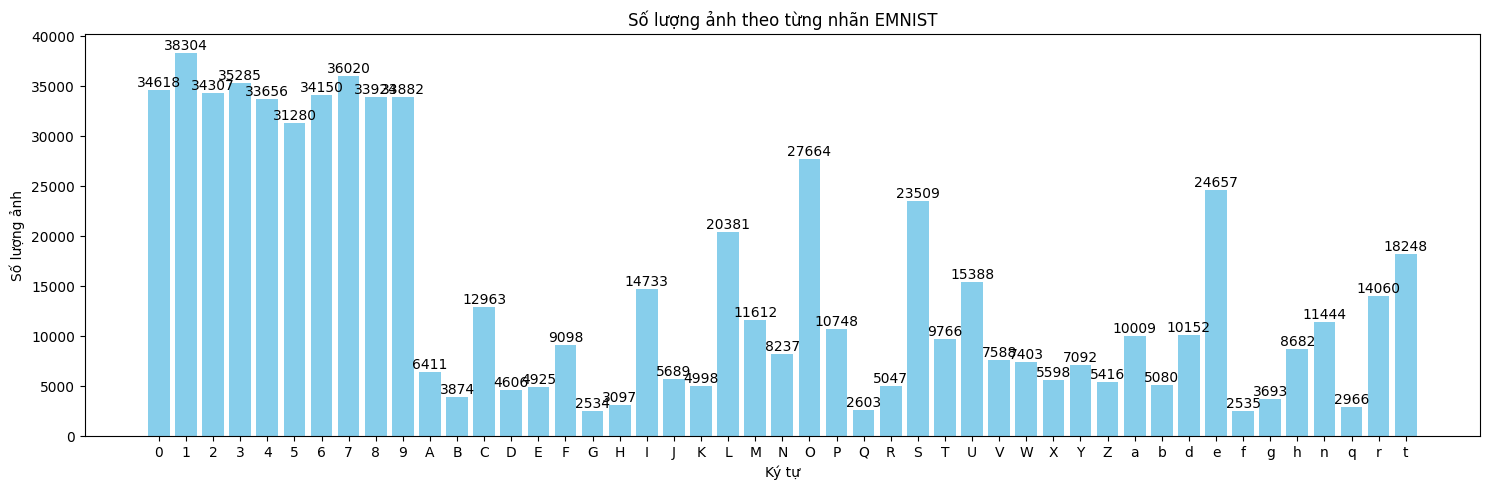

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

label_counts = pd.Series(y_train).value_counts().sort_index()

plt.figure(figsize=(15,5))
bars = plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xticks(label_counts.index, [label_df.loc[i, 'char'] for i in label_counts.index])
plt.xlabel("Ký tự")
plt.ylabel("Số lượng ảnh")
plt.title("Số lượng ảnh theo từng nhãn EMNIST")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



# 2 Tiền xử lý ảnh

## 2.1 Chuẩn hóa ảnh
- Chuẩn hóa pixel về [0,1].
- Thêm channel cho ảnh grayscale.
- Resize ảnh để phù hợp với mạng CNN.
- Chuyển TensorFlow tensor về NumPy array để dễ thao tác.

In [7]:
import tensorflow as tf

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape lại thành (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# Phóng ảnh từ 28x28 lên 32x32
X_train = tf.image.resize(X_train, [32, 32]).numpy()
X_test  = tf.image.resize(X_test,  [32, 32]).numpy()

print("Train resized shape:", X_train.shape)
print("Test resized shape:", X_test.shape)

Train resized shape: (697932, 32, 32, 1)
Test resized shape: (116323, 32, 32, 1)


## 2.2 Sử dụng one hot encoding

In [8]:
from tensorflow.keras.utils import to_categorical

num_classes = len(label_df)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


## 2.3 Chia tập train và validation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


## 2.4 Tăng cường ảnh

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=5,
    zoom_range=0.10
)

datagen.fit(X_train)

# 3 Huấn luyện mô hình CNN

## 3.1 Xây dựng mô hình CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten


model = Sequential([
    Conv2D(64, (5,5), activation='relu', padding='same', input_shape=(32,32,1)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │        24,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,378,863 (35.78 MB)

 Trainable params: 9,376,431 (35.77 MB)

 Non-trainable params: 2,432 (9.50 KB)

## 3.2 Lập callback giám sát

- EarlyStopping: Dừng huấn luyện sớm nếu validation loss (val_loss) không giảm trong patience=k epoch.

- ReduceLROnPlateau: Giảm learning rate nếu validation loss không cải thiện.

- ModelCheckpoint: Lưu mô hình vào file "best_emnist_cnn.keras".

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5),
    ModelCheckpoint("best_emnist_cnn.keras", save_best_only=True)
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## 3.3 Huấn luyện mô hình

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=512),
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 328s 277ms/step - accuracy: 0.7683 - loss: 0.7781 - val_accuracy: 0.8942 - val_loss: 0.2879 - learning_rate: 0.0010
Epoch 2/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 283s 259ms/step - accuracy: 0.8780 - loss: 0.3425 - val_accuracy: 0.8956 - val_loss: 0.2829 - learning_rate: 0.0010
Epoch 3/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 283s 259ms/step - accuracy: 0.8865 - loss: 0.3135 - val_accuracy: 0.8941 - val_loss: 0.2861 - learning_rate: 0.0010
Epoch 4/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 281s 258ms/step - accuracy: 0.8897 - loss: 0.3001 - val_accuracy: 0.8979 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 5/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 279s 256ms/step - accuracy: 0.8932 - loss: 0.2899 - val_accuracy: 0.8935 - val_loss: 0.2755 - learning_rate: 0.0010
Epoch 6/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 279s 256ms/step - accuracy: 0.8951 - loss: 0.2818 - val_accuracy: 0.9025 - val_loss: 0.2525 - learning_rate: 0.0010
Epoch 7/40
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 279s 256ms

## 3.4 Biểu đồ ACC và Loss khi huấn luyện


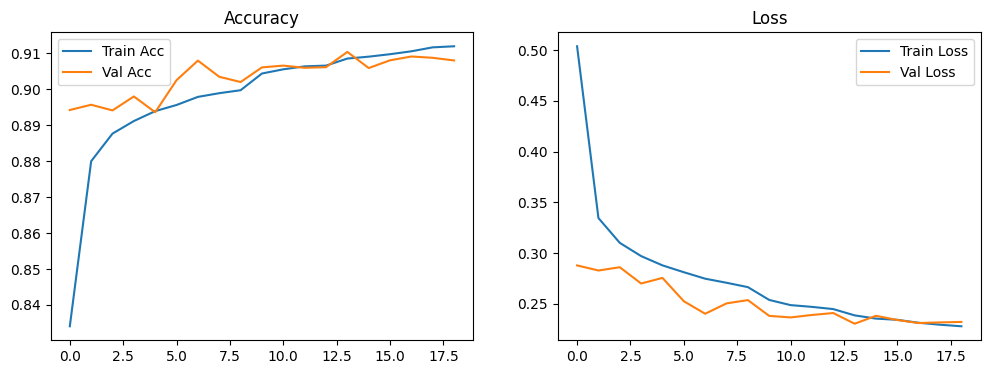

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


# 4 Đánh giá

## 4.1 Độ chính xác trên tập test

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


3636/3636 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9091 - loss: 0.2357
Test accuracy: 0.9099, Test loss: 0.2330


## 4.2 Dự đoán nhãn của tập test

In [16]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      5745
           1       0.67      0.92      0.77      6400
           2       0.97      0.98      0.97      5765
           3       1.00      1.00      1.00      5827
           4       0.98      0.99      0.98      5498
           5       0.96      0.95      0.96      5326
           6       0.99      0.98      0.98      5787
           7       0.99      1.00      0.99      5873
           8       0.99      0.99      0.99      5655
           9       0.93      0.98      0.96      5651
          10       0.95      0.99      0.97      1058
          11       0.97      0.98      0.98       652
          12       0.97      0.98      0.98      2156
          13       0.90      0.94      0.92       735
          14       0.98      0.99      0.99       860
          15       0.80      0.96      0.87      1524
          16       0.87      0.96    

## 4.3 Hiển thị ảnh dự đoán trên tập test

In [21]:
def rotate_and_flip_e(image):
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

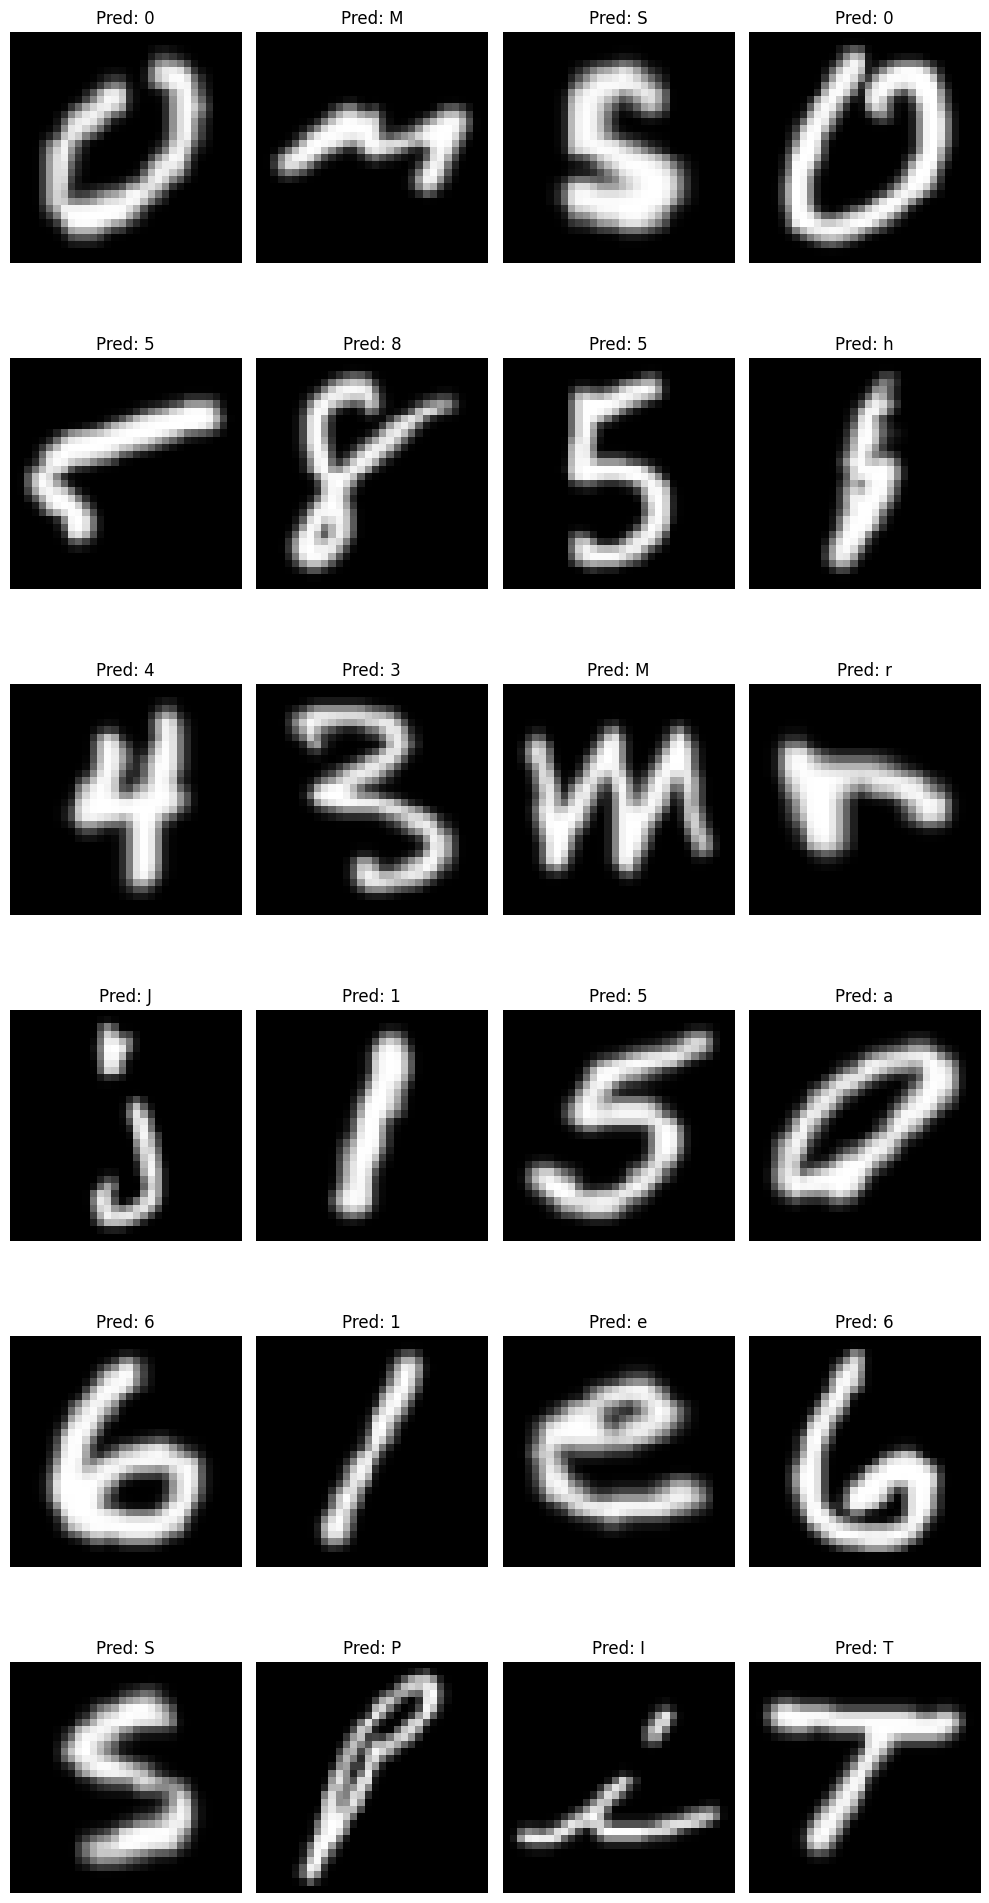

In [22]:
plt.figure(figsize=(10,20))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(rotate_and_flip_e(X_test[i]), cmap='gray')
    plt.title(f"Pred: {label_df.loc[y_pred[i], 'char']}")
    plt.axis('off')
plt.tight_layout()
plt.show()
